# Predictive Modeling for Customer Churn
## BY: Laukit Mandal
### The objective of this assignment is to build a predictive model that can predict customer churn for a given company.Use machine learning techniques to build the model and document the process, including feature selection, model evaluation, and performance metrics.

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import plotly.express as px

In [48]:
df=pd.read_csv('bank.csv',sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


**EDA**

In [49]:
df.shape

(4521, 17)

In [50]:
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [51]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [52]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [53]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [54]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


**Plotting Correlation Matrix To Find The Correlation Between The Variables**

<AxesSubplot:>

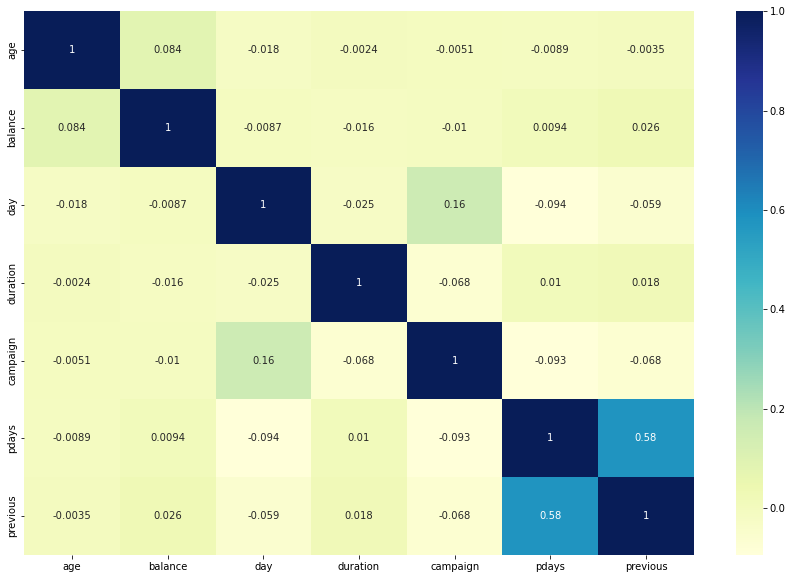

In [55]:
plt.figure(figsize = (15,10))
correlation = df.corr()
sns.heatmap(df.corr(), color="k", annot=True, cmap="YlGnBu")

In [56]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<AxesSubplot:xlabel='poutcome', ylabel='duration'>

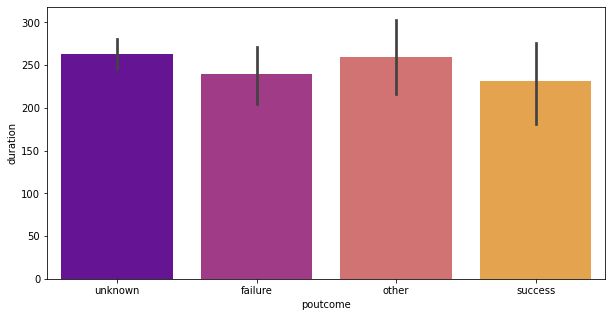

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x ='poutcome', y ='duration', data = df,palette ='plasma', estimator = np.std)

<AxesSubplot:xlabel='poutcome', ylabel='age'>

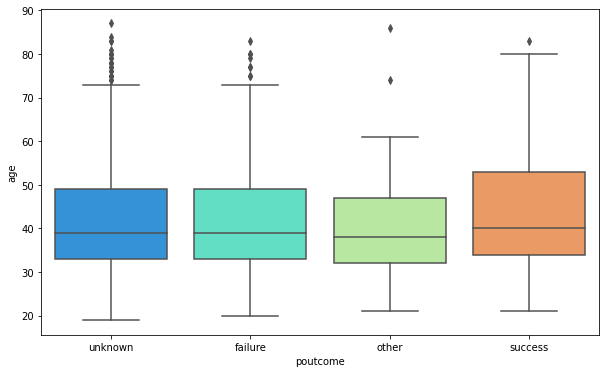

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x='poutcome',y='age',data=df, palette='rainbow')

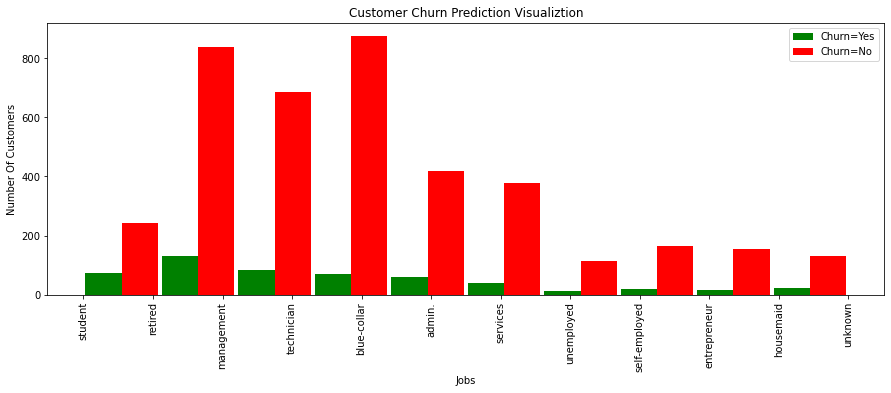

In [73]:
plt.figure(figsize=(15,5))
mc_churn_no = df[df.y=='no'].job     
mc_churn_yes = df[df.y=='yes'].job   

plt.xlabel("Jobs")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.xticks(rotation=90)
plt.legend()

In [355]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [356]:
df.rename(columns={"y":"Churn"}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Churn
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [357]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Churn'],
      dtype='object')

**Data Pre-Processing**

In [359]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')  

print_unique_col_values(df)

job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital: ['married' 'single' 'divorced']
education: ['primary' 'secondary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome: ['unknown' 'failure' 'other' 'success']
Churn: ['no' 'yes']


In [360]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Churn
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [361]:
yes_no_columns = ['default','housing','loan','Churn']
for col in yes_no_columns:
    df[col].replace({'yes': 1,'no': 0},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Churn
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [362]:
print_unique_col_values(df)

job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital: ['married' 'single' 'divorced']
education: ['primary' 'secondary' 'tertiary' 'unknown']
contact: ['cellular' 'unknown' 'telephone']
month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome: ['unknown' 'failure' 'other' 'success']


**Feature Selection Using Chi-Square**

In [363]:
#LABEL ENCODING THE OBJECT DATA Or WE CAN ALSO USE ONE_HOT ENCODING 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols=['job','marital','education','contact','month','poutcome']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [364]:
df1=df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols=['job','marital','education','contact','month','poutcome']
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
df1.head()
#['job','marital','education','contact','month','poutcome','housing','previous','loan']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Churn
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [365]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1[['job','marital','education','contact','month','poutcome','housing','previous','loan']],
                                              df1['Churn'],test_size=0.3,random_state=100)


In [366]:
X_train.head()

,job,marital,education,contact,month,poutcome,housing,previous,loan
2085,1,1,1,0,5,3,1,0,0
1239,1,2,1,0,8,3,1,0,1
130,1,1,0,0,9,3,1,0,0
2345,7,2,1,0,4,0,1,3,1
1296,2,1,1,2,6,3,0,0,0


In [367]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([1.44309081e-01, 1.84974902e-02, 3.69326686e+00, 8.89818112e+01,
        1.10351486e+01, 1.01436829e+01, 1.44110657e+01, 2.59738582e+02,
        1.54419867e+01]),
 array([7.04034234e-01, 8.91816950e-01, 5.46325128e-02, 3.98459339e-21,
        8.94005077e-04, 1.44796583e-03, 1.46936338e-04, 1.95658682e-58,
        8.50769080e-05]))

In [368]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

job          7.040342e-01
marital      8.918169e-01
education    5.463251e-02
contact      3.984593e-21
month        8.940051e-04
poutcome     1.447966e-03
housing      1.469363e-04
previous     1.956587e-58
loan         8.507691e-05
dtype: float64

In [369]:
p_values.sort_index(ascending=True)

contact      3.984593e-21
education    5.463251e-02
housing      1.469363e-04
job          7.040342e-01
loan         8.507691e-05
marital      8.918169e-01
month        8.940051e-04
poutcome     1.447966e-03
previous     1.956587e-58
dtype: float64

**Observation:**<br>
**- 'Previous' column And 'PoutCome' column are the most important column when compared to the output feature which is 'Churn'.**<br>
**- Further We will keep only those features which are useful and remaning we will drop.**

In [371]:
cols=['job','marital','education','contact','month','housing','loan']
df.drop(cols,axis='columns',inplace=True)
df.head()

,age,default,balance,day,duration,campaign,pdays,previous,poutcome,Churn
0,30,0,1787,19,79,1,-1,0,3,0
1,33,0,4789,11,220,1,339,4,0,0
2,35,0,1350,16,185,1,330,1,0,0
3,30,0,1476,3,199,4,-1,0,3,0
4,59,0,0,5,226,1,-1,0,3,0


In [372]:
df.shape

(4521, 10)

**One Hot Encoding For Normalizing The Data**

In [373]:
#One hot encoding for categorical columns
df = pd.get_dummies(data=df, columns=['poutcome'])
df.columns

Index(['age', 'default', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'Churn', 'poutcome_0', 'poutcome_1', 'poutcome_2',
       'poutcome_3'],
      dtype='object')

In [374]:
df.head(20)

,age,default,balance,day,duration,campaign,pdays,previous,Churn,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,30,0,1787,19,79,1,-1,0,0,0,0,0,1
1,33,0,4789,11,220,1,339,4,0,1,0,0,0
2,35,0,1350,16,185,1,330,1,0,1,0,0,0
3,30,0,1476,3,199,4,-1,0,0,0,0,0,1
4,59,0,0,5,226,1,-1,0,0,0,0,0,1
5,35,0,747,23,141,2,176,3,0,1,0,0,0
6,36,0,307,14,341,1,330,2,0,0,1,0,0
7,39,0,147,6,151,2,-1,0,0,0,0,0,1
8,41,0,221,14,57,2,-1,0,0,0,0,0,1
9,43,0,-88,17,313,1,147,2,0,1,0,0,0


In [375]:
df.dtypes

age           int64
default       int64
balance       int64
day           int64
duration      int64
campaign      int64
pdays         int64
previous      int64
Churn         int64
poutcome_0    uint8
poutcome_1    uint8
poutcome_2    uint8
poutcome_3    uint8
dtype: object

**Converting Our 3 column values in the range of 0-1 As Scaling Columns Are: 'balance','pdays','duration'**

In [376]:
cols_to_scale = ['balance','pdays','duration']
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,age,default,balance,day,duration,campaign,pdays,previous,Churn,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,30,0,0.068455,19,0.024826,1,0.000000,0,0,0,0,0,1
1,33,0,0.108750,11,0.071500,1,0.389908,4,0,1,0,0,0
2,35,0,0.062590,16,0.059914,1,0.379587,1,0,1,0,0,0
3,30,0,0.064281,3,0.064548,4,0.000000,0,0,0,0,0,1
4,59,0,0.044469,5,0.073486,1,0.000000,0,0,0,0,0,1


In [377]:
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
default: [0 1]
balance: [0.06845546 0.10875022 0.06258976 ... 0.03999946 0.         0.05973074]
day: [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
duration: [2.48262165e-02 7.14995035e-02 5.99139358e-02 6.45481629e-02
 7.34856008e-02 4.53492221e-02 1.11552466e-01 4.86593843e-02
 1.75438596e-02 1.02284012e-01 8.90433631e-02 3.60807680e-02
 1.07249255e-01 8.50711685e-02 2.81363787e-02 6.12380007e-02
 7.77888117e-02 3.64117842e-02 8.14299901e-02 4.76663357e-02
 3.04534922e-02 4.50182059e-02 3.47567031e-02 4.00529626e-02
 5.46176763e-02 5.89208871e-02 8.04369414e-02 3.80668653e-02
 4.79973519e-02 2.31711354e-02 2.95597484e-01 2.54882489e-02
 1.19165839e-02 3.15789474e-01 1.15855677e-01 4.83283681e-02
 3.07845084e-02 4.23700761e-02 2.5

In [378]:
df.shape

(4521, 13)

In [379]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [380]:
y.value_counts()

0    4000
1     521
Name: Churn, dtype: int64

In [381]:
X.shape

(4521, 12)

**Handling imbalance Data set By SMOTE**<br>
**It basically generate synthetic data samples for the minority class to increase the number of instances of the minority class and balance the dataset**

In [382]:
#Handling imbalance Data set By SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    4000
1    4000
Name: Churn, dtype: int64

In [383]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=15,stratify=y_sm)

In [384]:
y_train.value_counts()

1    2800
0    2800
Name: Churn, dtype: int64

In [385]:
y_test.value_counts()

1    1200
0    1200
Name: Churn, dtype: int64

In [386]:
len(X_train.columns)

12

**ANN MODEL WITH 2 HIDDEN LAYERS**

In [387]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
175/175 [==============================] - 1s 966us/step - loss: 0.9445 - accuracy: 0.5698
Epoch 2/200
175/175 [==============================] - 0s 971us/step - loss: 0.6332 - accuracy: 0.6484
Epoch 3/200
175/175 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.6670
Epoch 4/200
175/175 [==============================] - 0s 989us/step - loss: 0.5900 - accuracy: 0.6923
Epoch 5/200
175/175 [==============================] - 0s 954us/step - loss: 0.5647 - accuracy: 0.7095
Epoch 6/200
175/175 [==============================] - 0s 983us/step - loss: 0.5207 - accuracy: 0.7518
Epoch 7/200
175/175 [==============================] - 0s 977us/step - loss: 0.4901 - accuracy: 0.7743
Epoch 8/200
175/175 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.7927
Epoch 9/200
175/175 [==============================] - 0s 960us/step - loss: 0.4374 - accuracy: 0.8062
Epoch 10/200
175/175 [==============================] - 0s 966us/step - loss:

175/175 [==============================] - 0s 960us/step - loss: 0.3359 - accuracy: 0.8509
Epoch 160/200
175/175 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8479
Epoch 161/200
175/175 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.8473
Epoch 162/200
175/175 [==============================] - 0s 954us/step - loss: 0.3353 - accuracy: 0.8512
Epoch 163/200
175/175 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8468
Epoch 164/200
175/175 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8461
Epoch 165/200
175/175 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8484
Epoch 166/200
175/175 [==============================] - 0s 966us/step - loss: 0.3436 - accuracy: 0.8446
Epoch 167/200
175/175 [==============================] - 0s 966us/step - loss: 0.3404 - accuracy: 0.8495
Epoch 168/200
175/175 [==============================] - 0s 1ms/step - loss: 0.

In [388]:
model.evaluate(X_test, y_test)

75/75 [==============================] - 0s 851us/step - loss: 0.3546 - accuracy: 0.8400


[0.35460758209228516, 0.8399999737739563]

In [389]:
y_predicted = model.predict(X_test)
y_predicted[:5]

array([[0.9992895 ],
       [0.9975794 ],
       [0.0165199 ],
       [0.38448584],
       [0.2408714 ]], dtype=float32)

In [390]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [391]:
y_pred[:10]

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [392]:
y_test[:10]

5952    1
6472    1
1539    0
1230    1
3621    0
716     0
1915    1
381     0
2594    0
3699    0
Name: Churn, dtype: int64

**Model Evaluation**

In [393]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1200
           1       0.85      0.83      0.84      1200

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400

